Максимальная разность  между ломаными Эйлера:  0.000850656464097765
Максимальное отклоение приближенного решения от аналитического:  0.00171786603567137


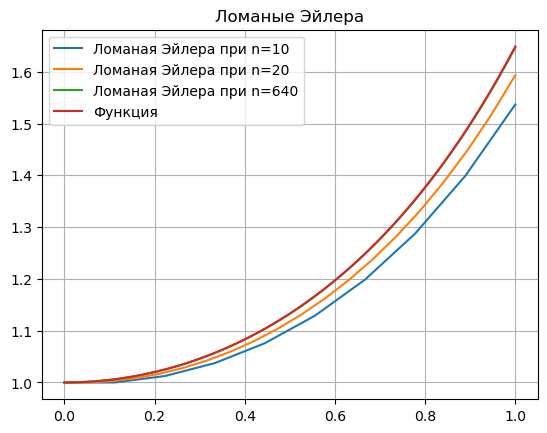

In [22]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x = Symbol('x')
y = Symbol('y')
f = Function('f')(x, y)

# a = x0
def euler_method(f, x_symb, y_symb, x0, y0, a, b, n0, epsilon): # (x0, y0) - нач точка, n0 - нач разбиение

    max_delta = 0
    
    n = n0
    n2 = n0*2
    
    def find_vertices(n):
        f = x_symb * y_symb
        
        x = np.linspace(a, b, n)
        y = [0] * n
        y[0] = y0
        
        for i in range(1, n):
            y[i] = y[i-1] + f.subs([(x_symb, x[i-1]), (y_symb, y[i-1])]) * (x[i]-x[i-1])

        if n == n0 or n == n0*2:
            plt.plot(x, y, label=f'Ломаная Эйлера при n={n}')
            
        return y

    
    y1 = find_vertices(n)
    y2 = find_vertices(n2)

    for i in range(0, 2*n, 2):
        max_delta =  max(max_delta, abs(y2[i] - y1[i//2]))
    
    while max_delta >= epsilon:
        max_delta = 0
        n = n2
        n2 = n*2
        y1 = y2
        y2 = find_vertices(n2)
        for i in range(0, 2*n, 2):
            max_delta =  max(max_delta, abs(y2[i] - y1[i//2]))
            
    if n != n0:
        x = np.linspace(a, b, n2)
        plt.plot(x, y2, label=f'Ломаная Эйлера при n={n2}')
        
    plt.grid()
    plt.title("Ломаные Эйлера")
    
    return y2, max_delta

a = 0
b = 1
euler_vertices, euler_delta = euler_method(f, x, y, 0, 1, a, b, 10, 0.001)

x = np.linspace(a, b, len(euler_vertices))
y = np.exp(x**2/2)

orig_vs_euler_delta = 0
for i in range(len(euler_vertices)):
    orig_vs_euler_delta = max(orig_vs_euler_delta, abs(y[i] - euler_vertices[i]))

print("Максимальная разность  между ломаными Эйлера: ", euler_delta)
print("Максимальное отклоение приближенного решения от аналитического: ", orig_vs_euler_delta)

plt.plot(x, y, label=f'Функция')
plt.legend()

Максимальное отклонение приближенного решения при n=10 от аналитического:  0.0012869117006650832


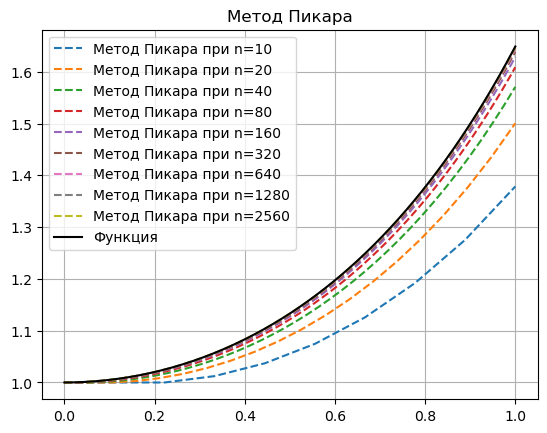

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

def picard_method(f_sym, x, y, x0, y0, n0):
    n = n0
    max_delta = 0

    def find_vertices(n):
        x_values = np.linspace(x0, 1, n)
        y_values = [0]*n
        y_values[0] = y0

        for i in range(1, n):
            integral_sum = 0
            for j in range(i-1):
                integral_sum += f(x_values[j], y_values[j]) * (x_values[j + 1] - x_values[j])
                
            y_values[i] = y0 + integral_sum

        plt.plot(x_values, y_values, label=f'Метод Пикара при n={n}', linestyle='--')
        return y_values

    y1 = find_vertices(n)
    n = n*2
    y2 = find_vertices(n)

    while True:
        max_delta = 0
        for i in range(0, n, 2):
            max_delta = max(max_delta, abs(y2[i] - y1[i//2]))

        if max_delta < 1e-3:  
            break

        y1 = y2
        y2 = find_vertices(2*n)
        n = n*2

    return y2

x = Symbol('x')
y = Symbol('y')
f = x * y
f = lambdify((x, y), f_sym, 'numpy')

x0 = 0
y0 = 1
n0 = 10

picard_vertices = picard_method(f_sym, x, y, x0, y0, n0)

x_real = np.linspace(x0, 1, len(picard_vertices))
y_real = np.exp(x_real**2 / 2)

orig_vs_picard_delta = max(abs(y_real[i] - picard_vertices[i]) for i in range(len(picard_vertices)))

print(f"Максимальное отклонение приближенного решения при n={n0} от аналитического: ", orig_vs_picard_delta)

plt.plot(x_real, y_real, label='Функция', color='black')
plt.legend()
plt.grid()
plt.title("Метод Пикара")
plt.show()